# 4장 : 통계학 및 선형 대수

# 기본적인 통계학

In [1]:
%matplotlib inline
import numpy as np
from scipy.stats import scoreatpercentile
import pandas as pd

data = pd.read_csv("co2.csv", index_col=0, parse_dates=True)

co2 = np.array(data.co2)

print("The statistical valus for amounts of co2 in atmosphere : \n")
print("Max method : ", co2.max())
print("Max function : ", np.max(co2))

print("Min method : ", co2.min())
print("Min function : ", np.min(co2))

print("Mean method : ", co2.mean())
print("Mean function : ", np.mean(co2))

print("Std method : ", co2.std())
print("Std function : ", np.std(co2))

print("Median : ", np.median(co2))
print("Score at percentile 50 : ", scoreatpercentile(co2, 50))

The statistical valus for amounts of co2 in atmosphere : 

Max method :  366.84
Max function :  366.84
Min method :  313.18
Min function :  313.18
Mean method :  337.0535256410256
Mean function :  337.0535256410256
Std method :  14.950221626197369
Std function :  14.950221626197369
Median :  335.17
Score at percentile 50 :  335.17


# 선형 대수

## 역행렬 구하기

In [2]:
A = np.mat("2 4 6;4 2 6;10 -4 18")

In [3]:
print("A\n", A)

A
 [[ 2  4  6]
 [ 4  2  6]
 [10 -4 18]]


In [4]:
inverse = np.linalg.inv(A)
print("inverse of A\n", inverse)

inverse of A
 [[-0.41666667  0.66666667 -0.08333333]
 [ 0.08333333  0.16666667 -0.08333333]
 [ 0.25       -0.33333333  0.08333333]]


In [5]:
print("Check\n", A * inverse)

Check
 [[ 1.00000000e+00 -2.22044605e-16  0.00000000e+00]
 [ 5.55111512e-17  1.00000000e+00  0.00000000e+00]
 [ 3.88578059e-16 -4.44089210e-16  1.00000000e+00]]


In [6]:
print("Error\n", A * inverse - np.eye(3))

Error
 [[ 0.00000000e+00 -2.22044605e-16  0.00000000e+00]
 [ 5.55111512e-17 -4.44089210e-16  0.00000000e+00]
 [ 3.88578059e-16 -4.44089210e-16  0.00000000e+00]]


## 선형 시스템 해석하기

In [7]:
A = np.mat("1 -2 1;0 2 -8;-4 5 9")
print("A\n", A)
b = np.array([0, 8, -9])
print("b\n", b)

A
 [[ 1 -2  1]
 [ 0  2 -8]
 [-4  5  9]]
b
 [ 0  8 -9]


In [8]:
x = np.linalg.solve(A, b)
print("Solution", x)

Solution [29. 16.  3.]


In [9]:
print("Check\n", np.dot(A , x))

Check
 [[ 0.  8. -9.]]


## 고유값과 고유벡터 구하기

In [10]:
A = np.mat("3 -2;1 0")
print("A\n", A)

print("Eigenvalues", np.linalg.eigvals(A))

eigenvalues, eigenvectors = np.linalg.eig(A)
print("First tuple of eig", eigenvalues)
print("Second tuple of eig\n", eigenvectors)

for i in range(len(eigenvalues)):
   print("Left", np.dot(A, eigenvectors[:,i]))
   print("Right", eigenvalues[i] * eigenvectors[:,i])

A
 [[ 3 -2]
 [ 1  0]]
Eigenvalues [2. 1.]
First tuple of eig [2. 1.]
Second tuple of eig
 [[0.89442719 0.70710678]
 [0.4472136  0.70710678]]
Left [[1.78885438]
 [0.89442719]]
Right [[1.78885438]
 [0.89442719]]
Left [[0.70710678]
 [0.70710678]]
Right [[0.70710678]
 [0.70710678]]


# 무작위 수

## 이항 분포

0 9


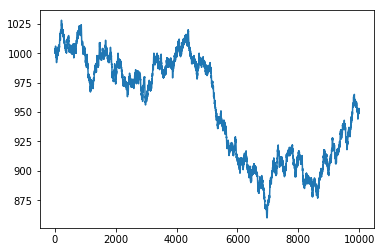

In [11]:
import numpy as np
from matplotlib.pyplot import plot, show

cash = np.zeros(10000)
cash[0] = 1000
outcome = np.random.binomial(9, 0.5, size=len(cash))

for i in range(1, len(cash)):

   if outcome[i] < 5:
      cash[i] = cash[i - 1] - 1
   elif outcome[i] < 10:
      cash[i] = cash[i - 1] + 1
   else:
      raise AssertionError("Unexpected outcome " + outcome)

print(outcome.min(), outcome.max())

plot(np.arange(len(cash)), cash)
show()

## 정규 분포

C:\Users\CPB06GameN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


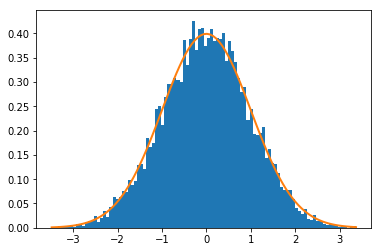

In [12]:
import numpy as np
import matplotlib.pyplot as plt

N=10000

normal_values = np.random.normal(size=N)
dummy, bins, dummy = plt.hist(normal_values, int(np.sqrt(N)), normed=True, lw=1)
sigma = 1
mu = 0
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),lw=2)
plt.show()

## SciPy로 정규성 검증

In [23]:
import numpy as np
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import normaltest

flutrends = np.loadtxt("goog_flutrends.csv", delimiter=',', usecols=(1,), skiprows=1, converters = {1: lambda s: float(s or 0)}, unpack=True)
N = len(flutrends)
normal_values = np.random.normal(size=N)
zero_values = np.zeros(N)

# 샤피로 검증 : p-value가 0.05보다 클때 정규성을 띤다
#                              통계량               p-value
# Normal Values Shapiro (0.9985182285308838, 0.9054849147796631)
# 표본수(n) 2000(5000) 미만인 데이터 셋에 적합

print('-'*70)
print('샤피로 검증')
print("Normal Values Shapiro", shapiro(normal_values))
#print("Zeroes Shapiro", shapiro(zero_values))
print("Flu Shapiro", shapiro(flutrends))
print('-'*70)

# 앤더슨 달링 검증 : 통계량이 유의수준에서의 임계값보다 작으면 정규성을 띤다.
# 표본수(n) 5만개 이상인 데이터 셋에 가능


print('-'*70)
print('앤더슨 달링 검증')
# 통계량(statistic), 임계량(critical_values)
# 유의 수준(significance_level)  ==>  표본에 의한 가설의 검정에서 가설을 잘못하여 기각하는 확률적인 정도 


# statistic=0.16613497944672417, 
# critical_values=array([0.572, 0.652, 0.782, 0.912, 1.085]), 
# significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])

print("Normal Values Anderson", anderson(normal_values))
#print("Zeroes Anderson", anderson(zero_values))
print("Flu Anderson", anderson(flutrends))
print('-'*70)


# 피어슨 검증 : 카이제곱 검정
# 표본 크기(n)이 1000 이하 
# p값이 0.5보다 작을 때 정규성을 띤다
print('-'*70)
print('피어슨 검증')
print("Normal Values normaltest", normaltest(normal_values))
#print("Zeroes normaltest", normaltest(zero_values))
print("Flu normaltest", normaltest(flutrends))
print('-'*70)

----------------------------------------------------------------------
샤피로 검증
Normal Values Shapiro (0.9971199631690979, 0.38350948691368103)
Flu Shapiro (0.9351992011070251, 2.2946666759787607e-15)
----------------------------------------------------------------------
----------------------------------------------------------------------
앤더슨 달링 검증
Normal Values Anderson AndersonResult(statistic=0.26442851314618565, critical_values=array([0.572, 0.652, 0.782, 0.912, 1.085]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Flu Anderson AndersonResult(statistic=8.258614154768793, critical_values=array([0.572, 0.652, 0.782, 0.912, 1.085]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
----------------------------------------------------------------------
----------------------------------------------------------------------
피어슨 검증
Normal Values normaltest NormaltestResult(statistic=2.129193627822793, pvalue=0.34486687226569407)
Flu normaltest NormaltestResult(statist

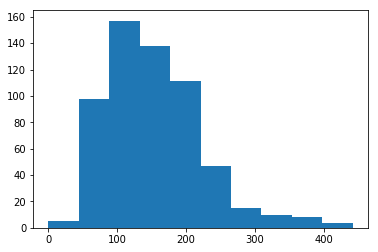

In [31]:
plt.hist(flutrends)
# plt.boxplot(flutrends)
plt.show()
# 중앙값에 제일 많아야 정규성이 있다고 표현할 수 있다.

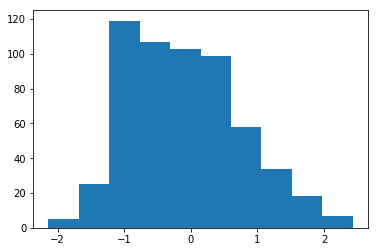

In [51]:
# 표준화
from sklearn.preprocessing import StandardScaler
flutrends.shape               
data_stand_skl = StandardScaler().fit_transform(flutrends)
data_stand_skl
data_stand_skl_zoomin =data_stand_skl[data_stand_skl<2.5]
# print(data_stand_skl_zoomin)
plt.hist(data_stand_skl_zoomin)
plt.show()

In [58]:
# 정규화 
from sklearn.preprocessing import MinMaxScaler
flutrends = flutrends.reshape(-1,1)
data_minmax_sklearn = MinMaxScaler().fit_transform(data_stand_skl_zoomin)
plt.hist(data_minmax_sklearn)
# plt.show

data_minmax_sklearn = data_minmax_sklearn.reshape(-1,)
# print("Flu Anderson", anderson(data_minmax_sklearn))

ValueError: Expected 2D array, got 1D array instead:
array=[-2.13923494e+00 -2.13923494e+00 -2.13923494e+00 -2.13923494e+00
 -2.13923494e+00 -2.25883129e-01 -9.92642591e-02 -1.55539312e-01
 -2.39951892e-01 -2.54020655e-01 -2.25883129e-01 -2.54020655e-01
  1.32858473e-02  8.36296638e-02  4.91623800e-01  5.76036379e-01
  4.77555036e-01  8.01136592e-01  1.22319949e+00  1.25133702e+00
  1.12471815e+00  1.39202465e+00  1.42016218e+00  1.53271228e+00
  1.49050599e+00  1.77188126e+00  2.43311314e+00  2.17987540e+00
  1.22319949e+00  1.08251186e+00  1.16692444e+00  1.02623681e+00
  6.88586486e-01  5.61967616e-01  1.01216804e+00  8.15205355e-01
  7.30792776e-01  8.57411645e-01  9.13686699e-01  7.44861539e-01
  3.08729877e-01  3.65004930e-01  3.65004930e-01  4.49417510e-01
  1.96179770e-01 -4.29892059e-02 -2.68089419e-01 -4.08777052e-01
 -4.36914578e-01 -6.05739738e-01 -6.90152318e-01 -7.32358608e-01
 -7.60496134e-01 -7.60496134e-01 -7.60496134e-01 -7.04221081e-01
 -7.04221081e-01 -7.04221081e-01 -7.04221081e-01 -5.35395921e-01
 -4.36914578e-01 -6.19808501e-01 -6.33877265e-01 -4.65052105e-01
 -4.08777052e-01 -3.80639525e-01 -2.54020655e-01 -2.54020655e-01
  1.04030557e+00  6.60448959e-01  6.46380196e-01  1.22319949e+00
  1.23726825e+00  1.58898734e+00  1.84222508e+00  1.70153744e+00
  1.70153744e+00  1.67339992e+00  1.43423094e+00  1.20913073e+00
  7.30792776e-01  9.13686699e-01  3.65004930e-01  5.19761326e-01
  6.18242669e-01  6.60448959e-01  1.09658062e+00  7.87067829e-01
  8.99617935e-01  4.91623800e-01  6.46380196e-01  4.49417510e-01
  1.32858473e-02  4.49417510e-01  5.90105143e-01  2.10248534e-01
  1.25835954e-01  3.08729877e-01 -2.89204426e-02 -2.96226945e-01
 -5.77602211e-01 -7.32358608e-01 -8.87115004e-01 -1.05594016e+00
 -1.04187140e+00 -9.85596347e-01 -9.01183767e-01 -8.87115004e-01
 -8.16771187e-01 -5.77602211e-01 -7.60496134e-01 -8.16771187e-01
 -7.18289844e-01 -7.74564898e-01 -6.47946028e-01 -2.11814366e-01
 -9.92642591e-02  2.73546106e-02  1.39904717e-01  5.61967616e-01
  5.19761326e-01  4.35348746e-01  6.60448959e-01  5.76036379e-01
  7.44861539e-01  6.46380196e-01  6.18242669e-01  6.32311433e-01
  1.32168083e+00  1.57491857e+00  1.70153744e+00  1.15285567e+00
  1.19506196e+00  1.05437433e+00  8.15205355e-01  7.02655249e-01
  7.87067829e-01  1.15285567e+00  9.27755462e-01  5.05692563e-01
  6.04173906e-01  5.90105143e-01  1.09658062e+00  5.47898853e-01
  3.08729877e-01  6.74517722e-01  1.82111007e-01  2.38386060e-01
  1.39904717e-01 -1.48516793e-02 -7.11267325e-02 -2.68089419e-01
 -5.63533448e-01 -7.46427371e-01 -8.16771187e-01 -9.85596347e-01
 -9.15252531e-01 -9.43390057e-01 -8.58977477e-01 -9.71527584e-01
 -6.62014791e-01 -7.74564898e-01 -8.73046241e-01 -8.58977477e-01
 -8.02702424e-01 -6.05739738e-01 -4.50983342e-01 -4.36914578e-01
 -1.27401786e-01  2.38386060e-01 -3.10295709e-01 -7.82916002e-04
  1.96179770e-01  4.63486273e-01  2.80592350e-01  4.35348746e-01
  7.44861539e-01  7.72999066e-01  8.29274119e-01  9.41824225e-01
  9.98099278e-01  1.27947454e+00  1.12471815e+00  1.53271228e+00
  1.68746868e+00  1.40609341e+00  8.85549172e-01  1.20913073e+00
  1.06844309e+00  1.37795589e+00  1.67339992e+00  1.15285567e+00
  1.15285567e+00  1.12471815e+00  1.05437433e+00  6.74517722e-01
  5.47898853e-01  4.21279983e-01  2.10248534e-01  3.08729877e-01
  1.11767190e-01  3.93142456e-01  1.82111007e-01 -1.55539312e-01
 -6.05739738e-01 -6.05739738e-01 -8.30839951e-01 -9.15252531e-01
 -1.01373387e+00 -9.85596347e-01 -8.16771187e-01 -7.32358608e-01
 -6.47946028e-01 -6.19808501e-01 -6.76083554e-01 -5.77602211e-01
 -7.04221081e-01 -7.60496134e-01 -4.79120868e-01 -3.80639525e-01
 -2.96226945e-01 -3.24364472e-01 -1.97745602e-01  8.36296638e-02
  3.93142456e-01  4.21279983e-01  9.41824225e-01  1.58898734e+00
  2.34870056e+00  1.87036260e+00  1.98291271e+00  1.89850013e+00
  1.46236847e+00  1.64526239e+00  1.22319949e+00  5.05692563e-01
  3.22798640e-01  5.47898853e-01  3.93142456e-01  2.66523587e-01
  1.39904717e-01  2.66523587e-01  3.08729877e-01  1.82111007e-01
 -7.82916002e-04 -4.29892059e-02 -1.13333022e-01 -4.08777052e-01
 -6.19808501e-01 -7.88633661e-01 -8.58977477e-01 -1.04187140e+00
 -8.30839951e-01 -8.87115004e-01 -8.30839951e-01 -8.87115004e-01
 -8.87115004e-01 -8.58977477e-01 -7.74564898e-01 -7.60496134e-01
 -8.44908714e-01 -3.66570762e-01 -1.48516793e-02 -9.92642591e-02
 -2.89204426e-02  1.25835954e-01  3.08729877e-01  5.05692563e-01
  2.94661113e-01  4.77555036e-01  6.32311433e-01  8.15205355e-01
  9.13686699e-01  1.60305610e+00  2.34870056e+00  1.53271228e+00
  8.99617935e-01  6.88586486e-01  9.55892989e-01  8.15205355e-01
  7.58930302e-01  5.76036379e-01  5.47898853e-01  5.19761326e-01
  5.33830089e-01  3.79073693e-01  4.21279983e-01  6.95609005e-02
  1.39904717e-01  2.73546106e-02  2.73546106e-02 -1.97745602e-01
 -2.68089419e-01 -5.63533448e-01 -7.04221081e-01 -7.04221081e-01
 -7.04221081e-01 -9.57458821e-01 -8.87115004e-01 -7.60496134e-01
 -9.01183767e-01 -8.73046241e-01 -8.87115004e-01 -9.01183767e-01
 -9.29321294e-01 -9.57458821e-01 -8.58977477e-01 -8.87115004e-01
 -7.60496134e-01 -4.65052105e-01 -4.79120868e-01 -5.49464685e-01
 -4.93189632e-01 -3.24364472e-01 -1.97745602e-01  2.73546106e-02
  1.96179770e-01  1.68042244e-01  1.96179770e-01  5.33830089e-01
  1.12471815e+00  2.19394416e+00  2.41904437e+00  1.20913073e+00
  8.36296638e-02  2.52454823e-01  1.32858473e-02 -4.29892059e-02
  9.76984271e-02  1.96179770e-01 -2.89204426e-02 -1.13333022e-01
 -9.92642591e-02 -9.92642591e-02 -4.29892059e-02 -1.41470549e-01
 -1.13333022e-01 -1.55539312e-01 -1.55539312e-01 -3.80639525e-01
 -4.08777052e-01 -4.93189632e-01 -7.74564898e-01 -9.01183767e-01
 -9.71527584e-01 -9.15252531e-01 -1.25290285e+00 -1.23883409e+00
 -1.26697161e+00 -1.26697161e+00 -1.19662780e+00 -1.19662780e+00
 -1.22476532e+00 -1.15442151e+00 -1.18255903e+00 -1.14035274e+00
 -1.15442151e+00 -1.14035274e+00 -8.44908714e-01 -7.60496134e-01
 -8.02702424e-01 -6.05739738e-01 -5.35395921e-01 -3.52501999e-01
 -1.41470549e-01 -2.54020655e-01  1.53973480e-01  3.93142456e-01
  4.77555036e-01  4.77555036e-01  6.18242669e-01  8.15205355e-01
  7.72999066e-01  8.29274119e-01  4.91623800e-01  6.74517722e-01
  4.63486273e-01  5.61967616e-01  3.22798640e-01  5.90105143e-01
  4.91623800e-01  4.07211220e-01  1.82111007e-01  1.32858473e-02
 -1.27401786e-01 -1.97745602e-01 -2.89204426e-02  4.14233739e-02
 -8.51954958e-02  2.73546106e-02 -9.92642591e-02 -4.29892059e-02
 -2.68089419e-01 -1.83676839e-01 -3.94708288e-01 -6.47946028e-01
 -8.58977477e-01 -8.73046241e-01 -1.14035274e+00 -1.15442151e+00
 -1.19662780e+00 -1.25290285e+00 -1.26697161e+00 -1.22476532e+00
 -1.19662780e+00 -1.19662780e+00 -1.19662780e+00 -1.26697161e+00
 -1.26697161e+00 -1.28104038e+00 -1.05594016e+00 -8.87115004e-01
 -6.76083554e-01 -6.47946028e-01 -6.33877265e-01 -7.46427371e-01
 -5.21327158e-01 -4.50983342e-01 -3.66570762e-01 -2.54020655e-01
 -2.11814366e-01  2.73546106e-02  1.39904717e-01  2.94661113e-01
  1.11767190e-01  3.79073693e-01  5.33830089e-01  5.19761326e-01
  1.82111007e-01 -8.51954958e-02 -1.13333022e-01 -1.69608076e-01
 -2.54020655e-01 -7.82916002e-04 -7.11267325e-02 -9.92642591e-02
 -5.07258395e-01 -7.32358608e-01 -8.02702424e-01 -9.01183767e-01
 -9.99665110e-01 -8.87115004e-01 -8.58977477e-01 -8.44908714e-01
 -9.43390057e-01 -9.43390057e-01 -1.05594016e+00 -1.18255903e+00
 -1.26697161e+00 -1.26697161e+00 -1.35138419e+00 -1.33731543e+00
 -1.32324667e+00 -1.36545296e+00 -1.35138419e+00 -1.33731543e+00
 -1.35138419e+00 -1.35138419e+00 -1.37952172e+00 -1.33731543e+00
 -1.25290285e+00 -1.23883409e+00 -1.12628398e+00 -1.02780264e+00
 -8.44908714e-01 -9.29321294e-01 -7.88633661e-01 -8.30839951e-01
 -7.60496134e-01 -6.19808501e-01 -4.36914578e-01 -2.82158182e-01
 -1.27401786e-01  1.11767190e-01  4.49417510e-01  6.74517722e-01
  5.47898853e-01  6.32311433e-01  2.66523587e-01  1.96179770e-01
 -7.82916002e-04  6.95609005e-02 -5.70579692e-02 -1.13333022e-01
 -7.11267325e-02  9.76984271e-02  2.24317297e-01  1.96179770e-01
  3.22798640e-01  1.68042244e-01  1.25835954e-01 -7.11267325e-02
 -1.55539312e-01 -2.82158182e-01 -4.22845815e-01 -4.79120868e-01
 -7.04221081e-01 -6.62014791e-01 -7.60496134e-01 -8.30839951e-01
 -9.57458821e-01 -1.02780264e+00 -1.07000893e+00 -1.08407769e+00
 -1.05594016e+00 -1.15442151e+00 -1.12628398e+00 -1.14035274e+00
 -1.16849027e+00 -1.04187140e+00 -1.05594016e+00 -1.08407769e+00
 -1.04187140e+00 -1.07000893e+00 -9.57458821e-01 -6.33877265e-01
 -5.49464685e-01 -8.16771187e-01 -6.90152318e-01 -6.47946028e-01
 -6.62014791e-01 -8.02702424e-01 -6.05739738e-01 -3.38433235e-01
  5.54921372e-02  3.93142456e-01  7.72999066e-01  9.27755462e-01
  9.69961752e-01  1.20913073e+00  1.12471815e+00  8.99617935e-01
  5.47898853e-01  4.91623800e-01  2.94661113e-01  1.68042244e-01
  2.52454823e-01  3.93142456e-01  4.77555036e-01  3.65004930e-01
 -7.11267325e-02 -3.80639525e-01 -3.10295709e-01 -2.25883129e-01
 -3.38433235e-01 -5.49464685e-01 -6.47946028e-01 -7.60496134e-01
 -7.46427371e-01 -7.60496134e-01 -8.30839951e-01 -9.01183767e-01
 -9.99665110e-01 -1.08407769e+00 -1.16849027e+00 -1.19662780e+00
 -1.16849027e+00 -1.15442151e+00 -1.07000893e+00 -1.12628398e+00
 -1.01373387e+00 -1.07000893e+00 -1.15442151e+00 -1.14035274e+00
 -1.04187140e+00 -9.85596347e-01 -8.58977477e-01 -6.76083554e-01
 -4.79120868e-01 -6.33877265e-01 -7.18289844e-01 -5.91670975e-01
 -3.80639525e-01 -4.08777052e-01 -1.97745602e-01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Numpy 마스킹 배열

In [ ]:
import numpy
import scipy
import matplotlib.pyplot as plt

face = scipy.misc.face()

random_mask = numpy.random.randint(0, 2, size=face.shape)

plt.subplot(221)
plt.title("Original")
plt.imshow(face)
plt.axis('off')

masked_array = numpy.ma.array(face, mask=random_mask)

plt.subplot(222)
plt.title("Masked")
plt.imshow(masked_array)
plt.axis('off')

plt.subplot(223)
plt.title("Log")
plt.imshow(numpy.ma.log(face).astype("float32"))
plt.axis('off')


plt.subplot(224)
plt.title("Log Masked")
plt.imshow(numpy.ma.log(masked_array).astype("float32"))
plt.axis('off')

plt.show()

# 음수와 극단적인 값 제거하기

In [ ]:
import numpy as np
from datetime import date
import sys
import matplotlib.pyplot as plt

salary = np.loadtxt("MLB2008.csv", delimiter=',', usecols=(1,), skiprows=1, unpack=True)
triples = np.arange(0, len(salary), 3)
print("Triples", triples[:10], "...")

signs = np.ones(len(salary))
print("Signs", signs[:10], "...")

signs[triples] = -1
print("Signs", signs[:10], "...")

ma_log = np.ma.log(salary * signs)
print("Masked logs", ma_log[:10], "...")

dev = salary.std()
avg = salary.mean()
inside = np.ma.masked_outside(salary, avg - dev, avg + dev)
print("Inside", inside[:10], "...")

plt.subplot(311)
plt.title("Original")
plt.plot(salary)

plt.subplot(312)
plt.title("Log Masked")
plt.plot(np.exp(ma_log))

plt.subplot(313)
plt.title("Not Extreme")
plt.plot(inside)

plt.subplots_adjust(hspace=.9)

plt.show()